<a href="https://colab.research.google.com/github/Nscaglio/4105/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR4105/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)
def trinary_map(x):
    mapping = {'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}
    return mapping.get(x, 0)  # Default to 0 if the value is not in the mapping
housing['furnishingstatus'] = housing['furnishingstatus'].apply(trinary_map)
X1 = housing[['area',	'bedrooms',	'bathrooms',	'stories',	'mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'parking',	'prefarea','furnishingstatus']]
y = housing['price']
# Normalize the features (X1)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)  # Normalization
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=0.2, random_state=42)
# Convert back to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

Mounted at /content/drive


A.

Epoch [10/2000], Train Loss: 25231917842432.0000, Validation Loss: 30126070824960.0000
Epoch [20/2000], Train Loss: 25218548498432.0000, Validation Loss: 30110010834944.0000
Epoch [30/2000], Train Loss: 25188982849536.0000, Validation Loss: 30075252637696.0000
Epoch [40/2000], Train Loss: 25138808487936.0000, Validation Loss: 30016909869056.0000
Epoch [50/2000], Train Loss: 25064808382464.0000, Validation Loss: 29931568365568.0000
Epoch [60/2000], Train Loss: 24964738580480.0000, Validation Loss: 29816816402432.0000
Epoch [70/2000], Train Loss: 24837072355328.0000, Validation Loss: 29671175487488.0000
Epoch [80/2000], Train Loss: 24681184755712.0000, Validation Loss: 29493810954240.0000
Epoch [90/2000], Train Loss: 24496866066432.0000, Validation Loss: 29284416618496.0000
Epoch [100/2000], Train Loss: 24284269379584.0000, Validation Loss: 29042659033088.0000
Epoch [110/2000], Train Loss: 24043868651520.0000, Validation Loss: 28769538539520.0000
Epoch [120/2000], Train Loss: 23776337068

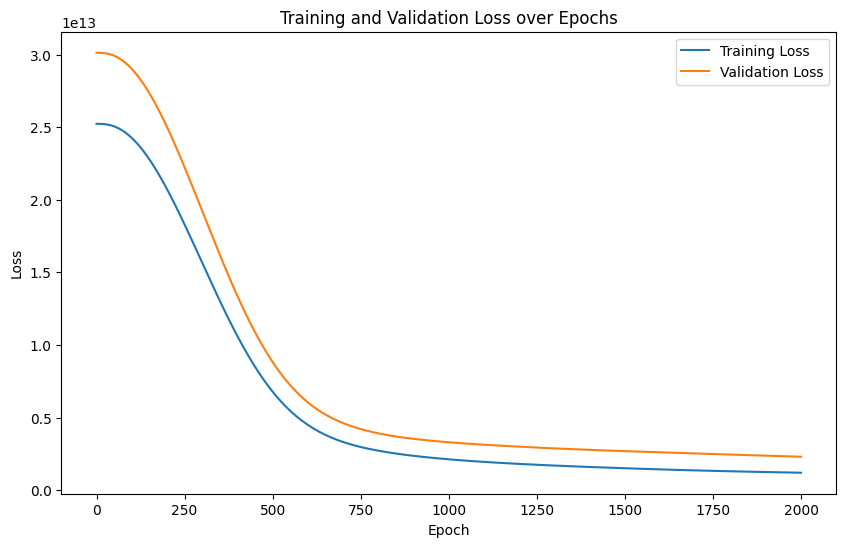

In [2]:
import torch.nn.functional as F
import time

# Define the fully connected neural network class
class HousingNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HousingNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer (input to hidden)
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second layer (hidden to output)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = self.fc2(x)          # Output layer (no activation function for regression)
        return x

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 8               # Number of neurons in the hidden layer
output_size = 1               # We are predicting a continuous value (price)
learning_rate = 0.5
epochs = 2000  # You can adjust this as necessary
batch_size = 1e13

# Initialize the model
model = HousingNN(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()  # For regression, we use MSE Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
start_time = time.time()
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing x to the model
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)

    # Compute the loss
    train_loss = criterion(outputs.flatten(), y_train)

    # Backward pass: compute gradient of the loss with respect to model parameters
    train_loss.backward()
    optimizer.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.flatten(), y_val)

    # Store the losses for plotting and analysis
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Print training stats every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# Training time
end_time = time.time()
training_time = end_time - start_time

# Print final results
print(f"Training completed in {training_time:.2f} seconds")
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

Has better results compared to previous homework, mostly because of free reign over the parameters. it also allows for a decrease in overfitting to training.

B.

Epoch [10/200], Train Loss: 24789469102080.0000, Validation Loss: 29314141650944.0000
Epoch [20/200], Train Loss: 13917366517760.0000, Validation Loss: 14010350043136.0000
Epoch [30/200], Train Loss: 5390794752000.0000, Validation Loss: 4952183799808.0000
Epoch [40/200], Train Loss: 3533452345344.0000, Validation Loss: 5002117513216.0000
Epoch [50/200], Train Loss: 1951274631168.0000, Validation Loss: 2943120310272.0000
Epoch [60/200], Train Loss: 1482508337152.0000, Validation Loss: 2543978545152.0000
Epoch [70/200], Train Loss: 1178933526528.0000, Validation Loss: 2119872937984.0000
Epoch [80/200], Train Loss: 1053461708800.0000, Validation Loss: 1905432854528.0000
Epoch [90/200], Train Loss: 998251364352.0000, Validation Loss: 1870723153920.0000
Epoch [100/200], Train Loss: 955368865792.0000, Validation Loss: 1794375155712.0000
Epoch [110/200], Train Loss: 927732793344.0000, Validation Loss: 1783979311104.0000
Epoch [120/200], Train Loss: 908416385024.0000, Validation Loss: 17701270

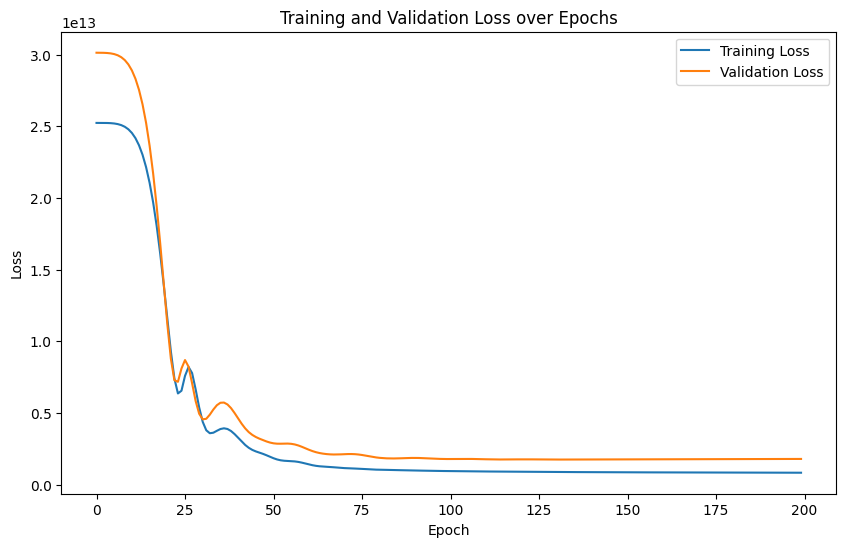

In [3]:
class HousingNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HousingNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer (input to hidden)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second layer (hidden to hidden)
        self.fc3 = nn.Linear(hidden_size, hidden_size)  # Third layer (hidden to hidden)
        self.fc4 = nn.Linear(hidden_size, output_size)  # Fourth layer (hidden to output)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = F.relu(self.fc2(x))  # Second layer
        x = F.relu(self.fc3(x))  # Third layer
        x = self.fc4(x)          # Output layer (no activation for regression)
        return x

epochs=200

# Initialize the model
model2 = HousingNN2(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()  # For regression, we use MSE Loss
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Training the model
start_time = time.time()
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing x to the model
    model2.train()
    optimizer.zero_grad()
    outputs = model2(X_train)

    # Compute the loss
    train_loss = criterion(outputs.flatten(), y_train)

    # Backward pass: compute gradient of the loss with respect to model parameters
    train_loss.backward()
    optimizer.step()

    # Validation loss
    model2.eval()
    with torch.no_grad():
        val_outputs = model2(X_val)
        val_loss = criterion(val_outputs.flatten(), y_val)

    # Store the losses for plotting and analysis
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Print training stats every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# Training time
end_time = time.time()
training_time = end_time - start_time

# Print final results
print(f"Training completed in {training_time:.2f} seconds")
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

Has improved learning compared to the model from the previous homework,has similar results to the previous model with less hidden layers, but converges significantly quicker.

2.A


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6628 - loss: 0.6287 - val_accuracy: 0.8772 - val_loss: 0.4404
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8842 - loss: 0.4177 - val_accuracy: 0.9561 - val_loss: 0.2965
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.3044 - val_accuracy: 0.9649 - val_loss: 0.2239
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9335 - loss: 0.2544 - val_accuracy: 0.9649 - val_loss: 0.1841
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.2084 - val_accuracy: 0.9649 - val_loss: 0.1578
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1878 - val_accuracy: 0.9737 - val_loss: 0.1396
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9589 - loss: 0.1667 - val_accuracy: 0.9737 - val_loss: 0.1259
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - loss: 0.1491 - val_accuracy: 0.9737 - 

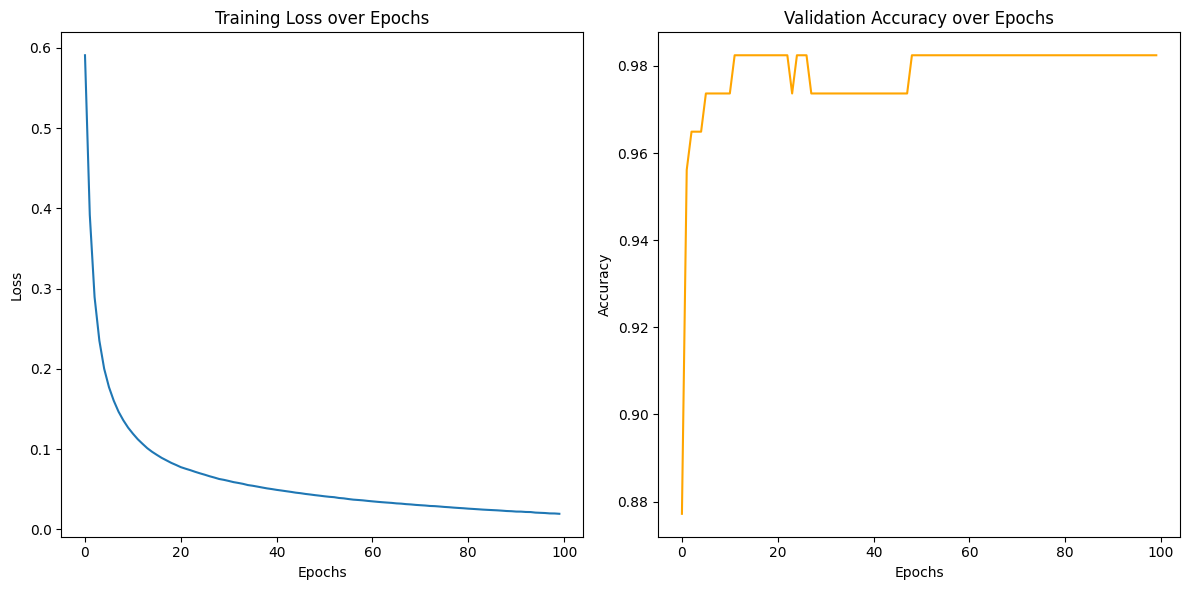

In [4]:
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Load the dataset (using sklearn's built-in Breast Cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the model
model = Sequential()

# Input layer (no need to specify input shape if it's the first layer)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # 1 hidden layer with 32 nodes

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and measure time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
end_time = time.time()

# Report the results
training_time = end_time - start_time
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']

# Final evaluation on the validation set
final_loss, final_accuracy = model.evaluate(X_val, y_val)

# Display results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")
print(f"Final Validation Loss: {final_loss:.4f}")

# Plot training loss and validation accuracy over epochs (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

This model achieved a higher acuracy than HW4, loss was not calulated there.

2.B

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.4543 - loss: 0.6805 - val_accuracy: 0.9123 - val_loss: 0.4912
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9213 - loss: 0.4420 - val_accuracy: 0.9649 - val_loss: 0.2946
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9453 - loss: 0.2592 - val_accuracy: 0.9825 - val_loss: 0.1414
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1434 - val_accuracy: 0.9825 - val_loss: 0.0858
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9743 - loss: 0.0865 - val_accuracy: 0.9825 - val_loss: 0.0688
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0873 - val_accuracy: 0.9825 - val_loss: 0.0622
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9783 - loss: 0.0719 - val_accuracy: 0.9912 - val_loss: 0.0535
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9817 - loss: 0.0650 - val_accuracy: 0.9912 -

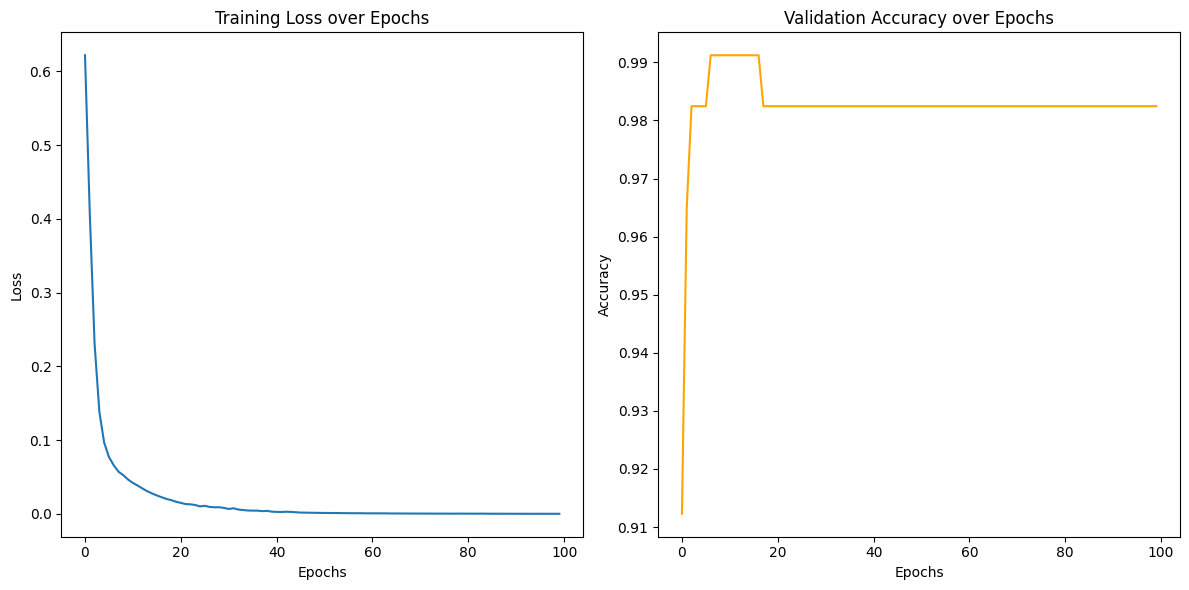

In [5]:
# Build the model
model = Sequential()

# Input layer (no need to specify input shape if it's the first layer)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # 1 hidden layer with 32 nodes

# Second hidden layer
model.add(Dense(64, activation='relu'))  # 64 nodes

# Third hidden layer
model.add(Dense(32, activation='relu'))  # 32 nodes

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and measure time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
end_time = time.time()

# Report the results
training_time = end_time - start_time
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']

# Final evaluation on the validation set
final_loss, final_accuracy = model.evaluate(X_val, y_val)

# Display results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")
print(f"Final Validation Loss: {final_loss:.4f}")

# Plot training loss and validation accuracy over epochs (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

newer model has a a better accuracy in exchange for a worse loss and slightly worse run time,

3.A

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 256)  # Input: 3 channels, 32x32 images
        self.fc2 = nn.Linear(256, 10)       # Output: 10 classes

    def forward(self, x):
        x = x.view(-1, 3*32*32)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Output layer (logits)
        return x

# 3. Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training the model for 100 epochs
start_time = time.time()
num_epochs = 100
train_loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Set the model to training mode
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Store the loss for this epoch
    avg_loss = running_loss / len(trainloader)
    train_loss_history.append(avg_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# 5. Evaluation of model accuracy on the test set after training
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = (correct / total) * 100
end_time = time.time()

# 6. Print the results
train_time = end_time - start_time
print(f"\nTraining completed in: {train_time:.2f} seconds")
print(f"Training Loss (final): {train_loss_history[-1]:.4f}")
print(f"Evaluation Accuracy after 100 epochs: {accuracy:.2f}%")

100%|██████████| 170M/170M [00:05<00:00, 30.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/100, Loss: 1.6436
Epoch 2/100, Loss: 1.4517
Epoch 3/100, Loss: 1.3647
Epoch 4/100, Loss: 1.2958
Epoch 5/100, Loss: 1.2321
Epoch 6/100, Loss: 1.1880
Epoch 7/100, Loss: 1.1332
Epoch 8/100, Loss: 1.0951
Epoch 9/100, Loss: 1.0442
Epoch 10/100, Loss: 0.9976
Epoch 11/100, Loss: 0.9649
Epoch 12/100, Loss: 0.9242
Epoch 13/100, Loss: 0.8956
Epoch 14/100, Loss: 0.8506
Epoch 15/100, Loss: 0.8235
Epoch 16/100, Loss: 0.7894
Epoch 17/100, Loss: 0.7539
Epoch 18/100, Loss: 0.7343
Epoch 19/100, Loss: 0.7014
Epoch 20/100, Loss: 0.6772
Epoch 21/100, Loss: 0.6464
Epoch 22/100, Loss: 0.6328
Epoch 23/100, Loss: 0.6187
Epoch 24/100, Loss: 0.5968
Epoch 25/100, Loss: 0.5626
Epoch 26/100, Loss: 0.5612
Epoch 27/100, Loss: 0.5434
Epoch 28/100, Loss: 0.5207
Epoch 29/100, Loss: 0.5048
Epoch 30/100, Loss: 0.4816
Epoch 31/100, Loss: 0.4758
Epoch 32/100, Loss: 0.4544
Epoch 33/100, Loss: 0.4443
Epoch 34/100, Loss: 0.4476
Ep

The accuracy is close to 50% meaning it can correctly classify 50% of the images with 10 different classifications

2.B

In [7]:

# 2. Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 256)  # Input: 3 channels, 32x32 images
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)       # Output: 10 classes

    def forward(self, x):
        x = x.view(-1, 3*32*32)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # Output layer (logits)
        return x

# 3. Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training the model for 100 epochs
start_time = time.time()
num_epochs = 100
train_loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Set the model to training mode
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Store the loss for this epoch
    avg_loss = running_loss / len(trainloader)
    train_loss_history.append(avg_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# 5. Evaluation of model accuracy on the test set after training
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = (correct / total) * 100
end_time = time.time()

# 6. Print the results
train_time = end_time - start_time
print(f"\nTraining completed in: {train_time:.2f} seconds")
print(f"Training Loss (final): {train_loss_history[-1]:.4f}")
print(f"Evaluation Accuracy after 100 epochs: {accuracy:.2f}%")

Epoch 1/100, Loss: 1.6558
Epoch 2/100, Loss: 1.4379
Epoch 3/100, Loss: 1.3303
Epoch 4/100, Loss: 1.2458
Epoch 5/100, Loss: 1.1752
Epoch 6/100, Loss: 1.1064
Epoch 7/100, Loss: 1.0516
Epoch 8/100, Loss: 0.9907
Epoch 9/100, Loss: 0.9368
Epoch 10/100, Loss: 0.8894
Epoch 11/100, Loss: 0.8357
Epoch 12/100, Loss: 0.7927
Epoch 13/100, Loss: 0.7541
Epoch 14/100, Loss: 0.7108
Epoch 15/100, Loss: 0.6710
Epoch 16/100, Loss: 0.6401
Epoch 17/100, Loss: 0.6101
Epoch 18/100, Loss: 0.5763
Epoch 19/100, Loss: 0.5517
Epoch 20/100, Loss: 0.5294
Epoch 21/100, Loss: 0.5030
Epoch 22/100, Loss: 0.4735
Epoch 23/100, Loss: 0.4605
Epoch 24/100, Loss: 0.4444
Epoch 25/100, Loss: 0.4230
Epoch 26/100, Loss: 0.4018
Epoch 27/100, Loss: 0.3899
Epoch 28/100, Loss: 0.3877
Epoch 29/100, Loss: 0.3685
Epoch 30/100, Loss: 0.3560
Epoch 31/100, Loss: 0.3372
Epoch 32/100, Loss: 0.3328
Epoch 33/100, Loss: 0.3262
Epoch 34/100, Loss: 0.3030
Epoch 35/100, Loss: 0.3206
Epoch 36/100, Loss: 0.2921
Epoch 37/100, Loss: 0.2959
Epoch 38/1

The increace in hidden layers made only marginal improvement in accuracy, at the cost of time. does not appear to be overfitting.